# Week 9 Quiz

## Qi Meng- qm2162

### Due Sun. Nov 21st, 11:59pm

In this quiz we'll practice scaling data and using PCA for dimensionality reduction.

### Load Standard Libraries

In [1]:
# Import numpy, pandas, matplotlib.pyplot and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set matplotlib to display inline
%matplotlib inline

### Load the Dataset

In [2]:
# Import the datasets submodule from sklearn.
from sklearn import datasets

# Load the breast cancer dataset using the load_breast_cancer() function.
# Store in the variable 'cancer'.
cancer = datasets.load_breast_cancer()

# Create a new dataframe df with values from cancer.data (which is stored as a numpy array)
#    and with columns named using cancer.feature_names (also a numpy array)
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# For this quiz, only keep the first 15 features/columns
# Store the result back into df
df = df.iloc[:,:15]

# Assert that the shape of the dataframe is (569,15): 569 columns, 15 rows
assert df.shape == (569,15)

### Calculate Summary Stats

In [3]:
# The distribution of features in this dataset vary quite a bit, affecting PCA performance.
# To get a sense of the difference, display the mean and standard deviation of each feature.
# Use the .agg() function, which takes a list of strings describing the functions to apply.
# Call .agg() on df using 'mean' and 'std'
df.agg(['mean', 'std'])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003


In [4]:
# This dataframe has many columns and few rows, so many columns that all of them cannot be displayed.
# For dataframes like this, it can be helpful to transpose them (turn rows into columns and columns into rows).
# To do this we can call transpose() on the dataframe, or .T for short.
# Print out the transposed version of the results of the .agg() from above.
df.agg(['mean', 'std']).T

,mean,std
mean radius,14.127292,3.524049
mean texture,19.289649,4.301036
mean perimeter,91.969033,24.298981
mean area,654.889104,351.914129
mean smoothness,0.096360,0.014064
mean compactness,0.104341,0.052813
mean concavity,0.088799,0.079720
mean concave points,0.048919,0.038803
mean symmetry,0.181162,0.027414
mean fractal dimension,0.062798,0.007060


### Scale the Data

In [5]:
# Scale the data to mean 0, standard deviation of 1 using sklearn StandardScaler

#Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Using StandardScaler with default settings create a new matrix X_scaled that is a scaled version of df.
X_scaled = StandardScaler().fit_transform(df)

# Store X_scaled as a dataframe df_scaled, with the same column names as the original dataframe
df_scaled = pd.DataFrame(X_scaled, columns=df.columns)

# Call .agg() on df_scaled using 'mean' and 'std' and display the transpose using .T
# Note that all features have been scaled
df_scaled.agg(['mean', 'std']).T

,mean,std
mean radius,-3.153111e-15,1.00088
mean texture,-6.568462e-15,1.00088
mean perimeter,-6.993039e-16,1.00088
mean area,-8.553985e-16,1.00088
mean smoothness,6.081447e-15,1.00088
mean compactness,-1.136369e-15,1.00088
mean concavity,-2.997017e-16,1.00088
mean concave points,1.023981e-15,1.00088
mean symmetry,-1.860648e-15,1.00088
mean fractal dimension,-1.504752e-15,1.00088


### Plot the First 2 Features From the Scaled Dataset

Text(0.5, 1.0, 'First Two Features of Dataset')

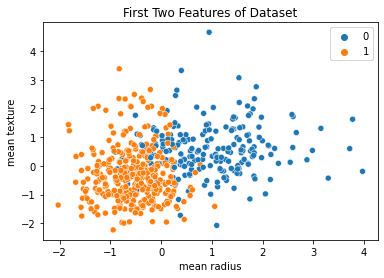

In [6]:
# Using seaborn, create a scatterplot with 'mean radius' on the x-axis and 'mean texture' on the y-axis.
# Use the scaled data in df_scaled.
# Color the points by their class assignment by setting hue=cancer.target.
# Capture the returned axis in ax
ax = sns.scatterplot(x='mean radius', y='mean texture', data=df_scaled, hue=cancer.target)

# Set the title to 'First Two Features of Dataset' using ax
ax.set_title('First Two Features of Dataset')

### Reduce Data to 2 Dimensions Using PCA

In [7]:
# Import PCA from sklearn.
from sklearn.decomposition import PCA

# Create a 2D transformation of the dataframe df_scaled using PCA() and fit_transform() and store in X_pca.
X_pca = PCA(n_components=2).fit_transform(df_scaled)

# Assert that the pca representation has the same number of rows (569) but now 2 columns
assert X_pca.shape == (569,2)

### Plot the Reduced Representation

Text(0.5, 1.0, '2D PCA')

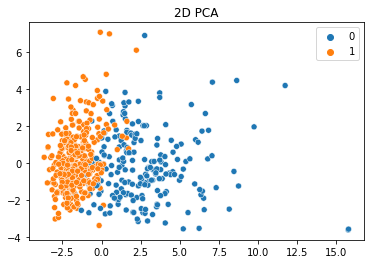

In [8]:
# Using seaborn, create a scatterplot with the first column of X_pca on the x-axis
#    and the second column of X_pca on the y-axis.
# Color the points by their class assignment by setting hue as cancer.target.
# Capture the returned axis in ax
ax = sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cancer.target)

# Set the title to '2D PCA' using ax
ax.set_title('2D PCA')

# Note that the plot won't look significantly different, but there should be more than just 
# a rotation of the points seen in the plot above of the first 2 dimensions of the dataset